# Python - MatplotlibとSeaborn

2020/04/05

- 参考教材
    - SkillUp AI
        - <https://www.skillupai.com/python_jdla/>
            - 機械学習のためのPython入門講座

- データの可視化を行う
- 可視化のポイント
    - 知りたいことに合わせて最適な可視化形式を選択できること

## Matplotlib

### グラフを描画するための基本的なコード

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

- ポイント
    - 「%matplotlib inline」とは、Matplotlibで描画したグラフをjupyter notebook上で  
      表示するために必要な記述

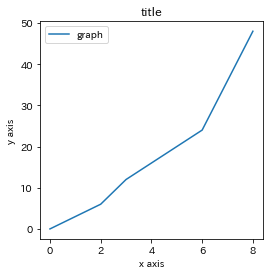

In [8]:
# グラフの初期化
#   figsize : グラフの描画領域のサイズを定義
#                  単位はインチ
plt.figure( figsize=(4,4) )

# 折れ線グラフを描くためにグラフに点を打つ（プロットする)
#   x軸、y軸、ラベル(=グラフ線の名前)
plt.plot( [0,2,3,6,8], [0,6,12,24,48], label='graph' )

# x軸の名前
plt.xlabel('x axis')

# y軸の名前
plt.ylabel('y axis')

# グラフのタイトル
plt.title('title')

# グラフの凡例を表示する
plt.legend()

# グラフを表示(描画)する
plt.show()

- ポイント
    - plotは折れ線グラフを描くためのもの
    - plotの引数 x軸、y軸 に対しては、通常の配列、または NumPy配列が指定可能
    - plt.show() は、グラフ描画を行うが、jupyter notebookでは記述しなくても描画される
        - plt.plot ... で描画もされる

### 複数のグラフをまとめて描画する

In [4]:
import numpy as np

In [5]:
# 0-10までの数字を20等分した数列を作成する
x = np.linspace(0,10,20)
print(x)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


In [6]:
# 数学の関数式を組み立てる
y = x**2
z = (x-1)**3
w = ((x-2)*(x-4))**2

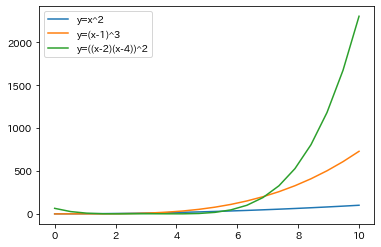

In [17]:
plt.plot( x , y , label = 'y=x^2' )
plt.plot( x , z , label = 'y=(x-1)^3' )
plt.plot( x , w , label = 'y=((x-2)(x-4))^2' )
plt.legend()

- ポイント
    - np.linspace(x,y,z) : xからyまでの値を、z等分したNumPy配列を生成する
    - 乗数は「 ** 」 で表現

### 複数のグラフを別々のグラフとして描画する

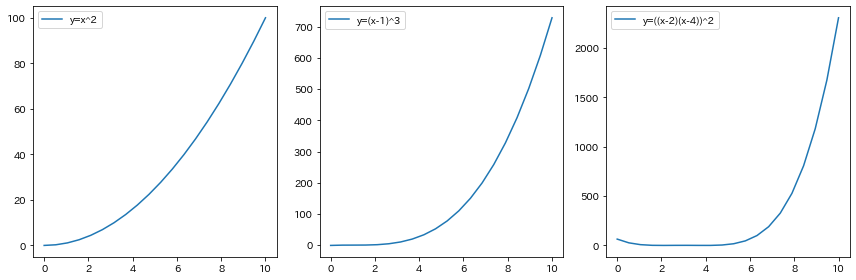

In [18]:
# グラフ全体のサイズ
plt.figure( figsize = (12,4) )

# 1番目に描画
plt.subplot( 1, 3, 1)
plt.plot( x , y , label = 'y=x^2' )
plt.legend()

# 2番目に描画
plt.subplot( 1, 3, 2)
plt.plot( x , z , label = 'y=(x-1)^3' )
plt.legend()

# 3番目に描画
plt.subplot( 1, 3, 3)
plt.plot( x , w , label = 'y=((x-2)(x-4))^2' )
plt.legend()

# グラフ同士が重ならないように位置を調整するための指定
plt.tight_layout()

- ポイント
    - plt.subplotで複数のグラフを別々に描画できる
    - plt.subplot( x, y, z) : xは行数、3は列数、zは描画位置(何番目に描画するか)を意味する
    - plt.tight_layout() : グラフ同士が重ならないように自動で判断して描画してくれる。

### 複数のグラフをスッキリしたコードで書く

- 上記コードは同じような記述を何度も繰り返しており、冗長で書くのが面倒
- 以下のように使い分ける
    - 一つのグラフを描画する : pyplotインタフェースを用いる
        - 上記までの記載方法がこちらにあたる
    - 複数のグラフを描画する : オブジェクト指向インタフェースを用いる
        - 以降で用いる記載方法

#### Matplotlibオブジェクト指向インタフェース
- Matplotlibの構成
    - figure : グラフ全体の描画領域。キャンバスのイメージ。
    - axes : 個々のグラフ。キャンバスの一部。
    - x axis : x軸
    - y axis : y軸
    - label : 凡例

これらを踏まえて、複数のグラフを描画していく。

#### plt.add_subplot を用いて記載する

- 空の figure に axesを追加していく方式

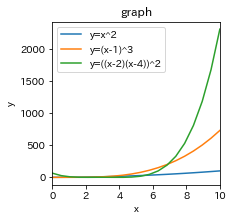

In [21]:
# グラフ全体の定義 : 空のfigureを作成
fig = plt.figure( figsize=(3,3) )

# axesの定義 : ここでは 1行1列1グラフの定義。
#    -> つまり、グラフを別個に描画せず、一つのグラフにまとめて描画するという意味
ax = fig.add_subplot( 1, 1, 1 )

# グラフに値をプロットする
ax.plot( x , y , label = 'y=x^2' )
ax.plot( x , z , label = 'y=(x-1)^3' )
ax.plot( x , w , label = 'y=((x-2)(x-4))^2' )

# グラフのxの範囲を指定 : ここでは 0 - 10　の範囲に絞るという意味
ax.set_xlim(0, 10)

ax.set_title('graph')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.legend()

- ポイント
    - axesに対してtitle、xlabel等を指定するときは 「 set_ 」 がつく
        - ax.set_title()
        - ax.set_xlabel()
    - plt (= pyplotインタフェース) を使う場合との違いに注意する
        - plt.title()
        - plt.xlabel()

#### plt.subplots を用いて記載する

- figureとaxesを同時に初期化する方式

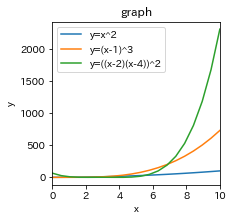

In [25]:
# figure, axesを同時に生成
#  -> 3x3 インチの描画領域
#  　　　　　-> 描画領域の中に、1行1列のaxesを設ける
fig , ax = plt.subplots( 1, 1, figsize=(3,3))

# グラフに値をプロットする
ax.plot( x , y , label = 'y=x^2' )
ax.plot( x , z , label = 'y=(x-1)^3' )
ax.plot( x , w , label = 'y=((x-2)(x-4))^2' )

# グラフのxの範囲を指定 : ここでは 0 - 10　の範囲に絞るという意味
ax.set_xlim(0, 10)

ax.set_title('graph')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.legend()

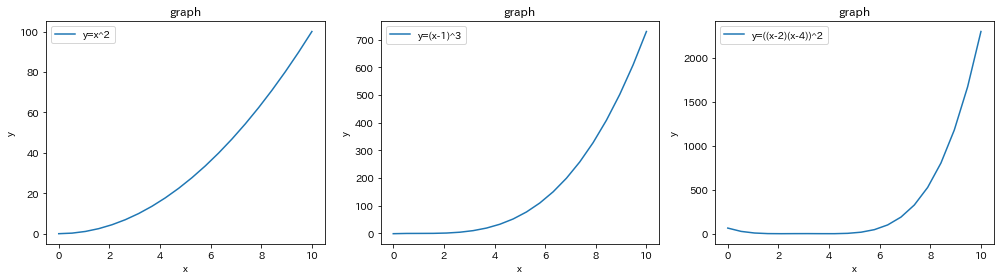

In [10]:
# 上記グラフを、別個のグラフとして描画する場合
#  -> 14x4 インチの描画領域
#  　　　　　-> 描画領域の中に、1行3列のaxesを設ける
#             -> この定義をすると ax が 1次元配列になる
fig , ax = plt.subplots( 1, 3, figsize=(14,4))

# 配列になっている　ax の各要素に対してグラフをプロットする
# グラフに値をプロットする
ax[0].plot( x , y , label = 'y=x^2' )
ax[1].plot( x , z , label = 'y=(x-1)^3' )
ax[2].plot( x , w , label = 'y=((x-2)(x-4))^2' )

# axが配列のため、titleやlabel設定も配列の数だけ定義する必要がある
# 記述簡略化のためforで回して定義している
for i in range( len(ax) ):
    ax[i].set_title('graph')
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('y')
    ax[i].legend()

plt.tight_layout()

No handles with labels found to put in legend.


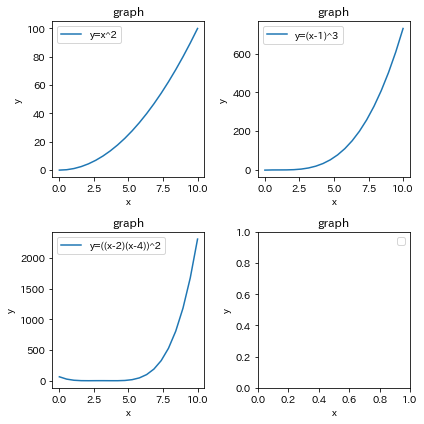

In [16]:
# 上記グラフを、別個のグラフとして描画する場合
#  -> 6x6 インチの描画領域
#  　　　　　-> 描画領域の中に、2行2列のaxesを設ける
#             -> この定義をすると ax が 二次元配列になる
fig , ax = plt.subplots( 2, 2, figsize=(6,6))

# 配列になっている　ax の各要素に対してグラフをプロットする
# グラフに値をプロットする
ax[0,0].plot( x , y , label = 'y=x^2' )
ax[0,1].plot( x , z , label = 'y=(x-1)^3' )
ax[1,0].plot( x , w , label = 'y=((x-2)(x-4))^2' )

# 二次元配列を一次元配列に変換してfor文で回しやすくする
converted_ax = ax.ravel()

for tmp_ax in converted_ax: 
    tmp_ax.set_title('graph')
    tmp_ax.set_xlabel('x')
    tmp_ax.set_ylabel('y')
    tmp_ax.legend()

plt.tight_layout()

- ポイント
    - fig , ax = plt.subplots() でfigureとaxesをまとめて定義できる
        - 複数の変数にまとめて代入できる
    - ax = plt.subplots(x,y) で指定する行列の数値が2以上になると  
      ax には配列が代入される
    - plt.subplots(x,y) の x,y が 2以上になると、2次元配列になる
        - ax = plt.subplots( 1, 3 ) : ax[0]〜ax[2]
        - ax = plt.subplots( 2, 2 ) : ax[0,0]〜ax[1,1]
    - 2次元配列の数値がグラフの描画位置と紐づいている
        - [0] [1] [2]
        - [0,0][0,1]  
          [1,0][1,1]
    - axが2次元配列になる場合は、 ax.ravel()　を使って一次元配列にすると  
      処理がしやすくなる

### csvからデータを読み込んでデータ確認・グラフ化

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

- 今回用いるデータセット  
<https://github.com/mwaskom/seaborn-data/blob/master/tips.csv>

In [19]:
tips = pd.read_csv("./tips.csv")

- 「tips」データについて
    - 有名なデータセットの一つ
    - チュートリアルでよく用いられる
        - ある飲食店で、木〜日曜の間でお客様がいくら注文し、  
          いくらチップを置いて行ったか？
        - （チップは日本にはない文化。英語圏等の文化におけるデータ）

- やること
    - データ全体確認
        - どんな列、どんな値、何行あるか ... など
    - 欠損値確認
        - 欠損しているとグラフが正しく描けない、処理中にエラーが出る原因になる、など

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### 可視化でよく用いられる表現まとめ
- 各要素の数を知りたい
    - 数値の「大きさ」に注目する
        - 棒グラフ : plt.bar  
  
  
- 各要素の全体に対する割合が知りたい1
    - 各要素が占める「割合」に注目する
        - 円グラフ : plt.pie  
  
  
 - 1つのデータ列の値の分布が知りたい
    - データの「取りうる値」と「値のばらつき」に注目する
        - ヒストグラム : plt.hist  
  
  
 - 2つのデータ列の値の分布が知りたい
    - データ同士の「関係性」に注目する
        - 散布図 : plt.scatter

#### 棒グラフ : plt.bar

<BarContainer object of 4 artists>

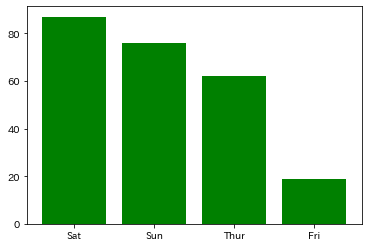

In [182]:
left = range(4)
day = tips['day'].value_counts().keys()
height = tips['day'].value_counts().values

#  - x軸上の「数値」
#     -> tick_label で x軸のラベルの名前を文字に置き換える
#  - y軸の「高さ」
#  - color : 色の指定。指定しなければデフォルトカラー（青っぽい色）になる。
plt.bar( left, height, tick_label = day , color = 'green')

- 参考:tick_labelを指定しない場合の見え方
    - x軸が数値になっていることが確認できる

<BarContainer object of 4 artists>

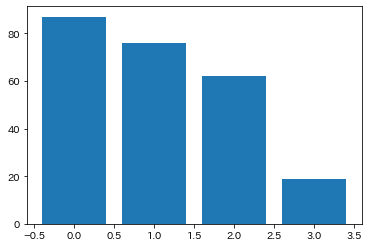

In [32]:
plt.bar(left, height)

#### 円グラフ: plt.pie

([<matplotlib.patches.Wedge at 0x1a2f76f110>,
 [Text(0.47909423581850485, 0.990186201280084, 'Sat'),
  Text(-1.0967192869113325, -0.08489290734035711, 'Sun'),
  Text(0.3074340394718735, -1.0561649072820052, 'Thur'),
  Text(1.06724906774893, -0.2664196452760947, 'Fri')],
 [Text(0.26132412862827537, 0.5401015643345912, '35.7 %'),
  Text(-0.598210520133454, -0.04630522218564932, '31.1 %'),
  Text(0.16769129425738552, -0.5760899494265482, '25.4 %'),
  Text(0.5821358551357799, -0.14531980651423346, '7.8 %')])

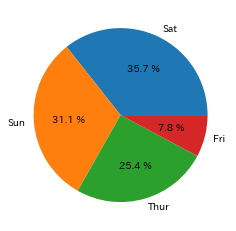

In [181]:
#  - 円グラフの値
#　 - autopct : フォーマット指定子
#       -> 各要素の割合を % としてグラフに表示させるための設定
#            [例] %.3f : 小数点第3位 
#                    末尾に 「%%」 と書くと 文字としての「%」が表示される 
#       -> autopct の記述がないと円グラフだけが表示される
#
#  - labels : 要素に名前をつける (barでの　tick_label　相当)
plt.pie( tips['day'].value_counts(), 
              autopct = "%.1f %%",
              labels = tips['day'].value_counts().keys() )

#### ヒストグラム : plt.hist

Text(0.5, 1.0, 'histogram of total_bill')

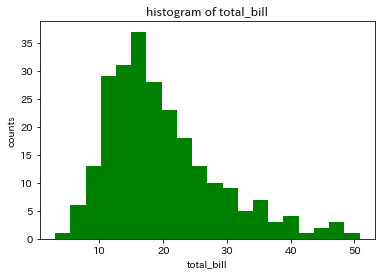

In [180]:
# ヒストグラム : hist
#   - 確認したい列を指定する
#   - bins : ビン( = 縦棒) の数を指定
#               ここで指定した数で割った分布を作成する
#               [例] bins = 20 なら　20当分にする
#   - color : 色の指定
plt.hist( tips['total_bill'] , bins = 20 , color = 'green')

# グラフ化は上記だけでできる。
# 他の設定をしたい場合は、併せて以下も実行する。

# x軸の名前をつける
plt.xlabel('total_bill')
# y軸に名前をつける
plt.ylabel('counts')
# グラフタイトルをつける
plt.title('histogram of total_bill')

#### 散布図 : plt.scatter

Text(0, 0.5, 'tip')

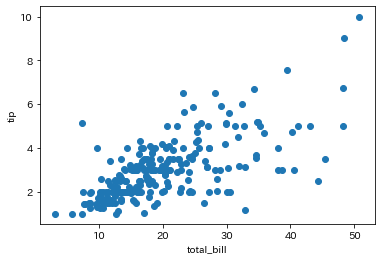

In [72]:
# 書き方 (1)

# 散布図 : hist
# x : 横軸に指定する列
# y : 縦軸に指定する列
plt.scatter(x = tips['total_bill'] , y = tips['tip'] )

# x軸の名前をつける
plt.xlabel('total_bill')
# y軸の名前をつける
plt.ylabel('tip')

Text(0, 0.5, 'tip')

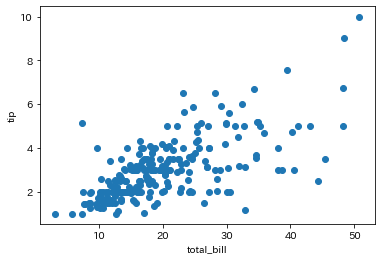

In [73]:
# 書き方 (2)

plt.scatter('total_bill', 'tip' , data = tips  )

plt.xlabel('total_bill')
plt.ylabel('tip')

### matplotlibでの各種グラフまとめ
- 棒グラフ : plt.bar
- 円グラフ: plt.pie
- ヒストグラム : plt.hist
- 散布図 : plt.scatter

## Seaborn

- Matplotlib との違い
    - 高度な(いろんなバリエーションの)グラフが描画できる
    - matplotlibより見た目が良いグラフが描画できる
    - matplotlibよりコードの記述が楽
        - 自動的に描画設定をしてくれる
- ベースは Matplotlib
    - Seabornの裏でMatplotlibが動いている
    - Matplotlibの描画機能を強化したようなもの
- Seabornの強み
    - 分析の可視化において重要なポイントをカバーしている
        - 複数の列同士の相関関係を簡単に描画することができる
            - 散布図行列
        - カテゴリ毎のデータ分布を簡単に描画することができる

In [74]:
import seaborn as sns

- [参考] なぜ as sns とする？
    - そう名付ける文化が根付いている
    - 由来情報
        - QA
            - <https://stackoverflow.com/questions/41499857/seaborn-why-import-as-sns?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa>
        - 「The West Wing」というTVシリーズに、Samuel Norman Seabornという登場人物がいる
            - The West Wing
                - <https://en.wikipedia.org/wiki/The_West_Wing>
            - Samuel Norman Seaborn
                - <https://en.wikipedia.org/wiki/Sam_Seaborn>

### Seabornでの各種グラフ
- 棒グラフ : sns.countplot
    - 平均と標準偏差(信頼区間)の棒グラフ : sns.barplot
        - 平均値を棒グラフの高さ、標準偏差を線(エラーバー)で表現
  
  
- 円グラフ : なし
    - seabornのissueにおいて、円グラフを実装しない旨が言及されている
        - <https://github.com/mwaskom/seaborn/issues/766>
        - > Sorry, no, seaborn will never support pie charts.
    - 円グラフは基本的には「使わない方が良い」グラフとのこと
        - <https://jikitourai.net/dont-use-piechart>
        - <https://dataviz.hatenablog.com/entry/2019/02/05/180316>
    - 分析の界隈では、円グラフよりも「積み上げ棒グラフ」の方が使いやすいとの主張も
        - <https://webtan.impress.co.jp/e/2008/11/28/4461>
  
  
- ヒストグラム : sns.distplot
  
  
- 散布図 : sns.regplot
  
  
- ヒートマップ : sns.heatmap

#### 棒グラフ: sns.countplot

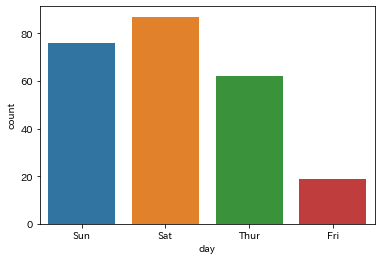

In [177]:
sns.countplot(tips['day']) 

- 引数で与えたデータから、xyのラベル名、カテゴリ分け、色分けなど  
  自動で判断してくれる

#### 棒グラフ(平均と標準偏差) : sns.barplot
- 特別な呼称があるのかは不明

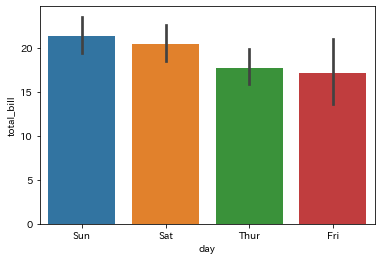

In [179]:
sns.barplot( tips['day'] , tips['total_bill'] )

- カテゴリ毎の平均値を見たい場合にこちらの棒グラフを用いる
    - グラフの上の黒い縦棒は標準偏差を表す

#### ヒストグラム : sns.distplot

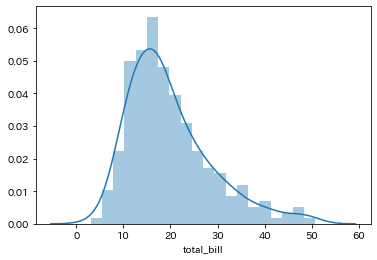

In [178]:
sns.distplot( tips['total_bill'] , bins = 20 )

- ヒストグラムを滑らかにした曲線も併せて描画してくれる
- どちらか一方だけを描画したい場合は以下のオプションが指定可能
    - kde = False を指定すると曲線を描画しない
    - hist = False を指定するとヒストグラムを描画しない

#### 散布図 : sns.regplot

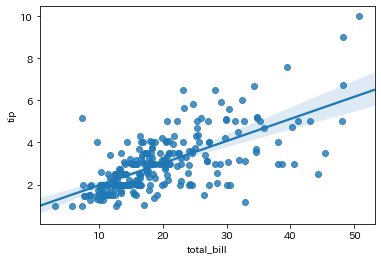

In [175]:
sns.regplot( tips['total_bill'] , tips['tip'] )

- 散布図と回帰直線(データの傾向を表現したもの)も併せて描画される
- どちらか一方だけを描画したい場合は以下のオプションが指定可能
    - scatter = False を指定すると散布図を描画しない
    - fit_reg = False を指定すると回帰直線を描画しない
- 回帰直線に対して、95%信頼区間も描画される

### 複数のグラフをまとめて描画する

- 復習 : Matplotlibの場合
    - subplots()
        - fig , ax = subplots( 2, 2 )
        - ax[0,0].plot( x , y , label = 'y=x^2' )

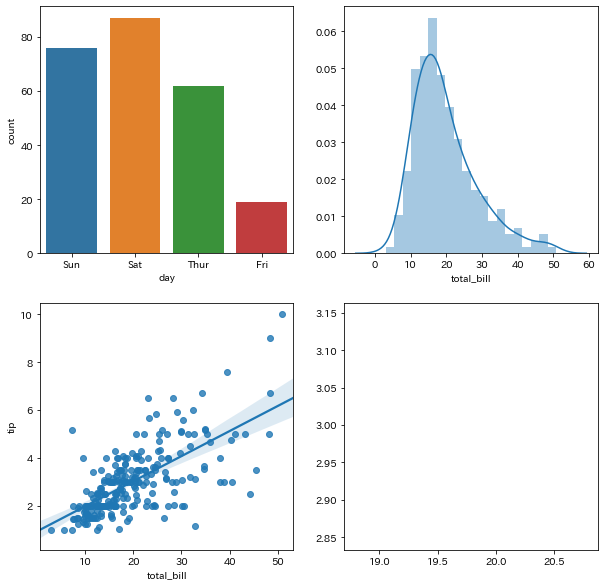

In [176]:
# 宣言部分は、Matplotlibと同様
fig , ax = plt.subplots( 2, 2, figsize = (10,10)  )

# axの配列にseabornのグラフを指定する
#　 - Matplotlibとの違いに注意
sns.countplot( tips['day'] ,ax = ax[0,0] )
sns.distplot( tips['total_bill'] , bins = 20 ,ax = ax[0,1] )
sns.regplot( tips['total_bill'] , tips['tip'] ,ax = ax[1,0] )

### 散布図行列 : sns.pairplot
- 全ての量的変数(数値型の変数)に対して、ヒストグラムと散布図を作成する

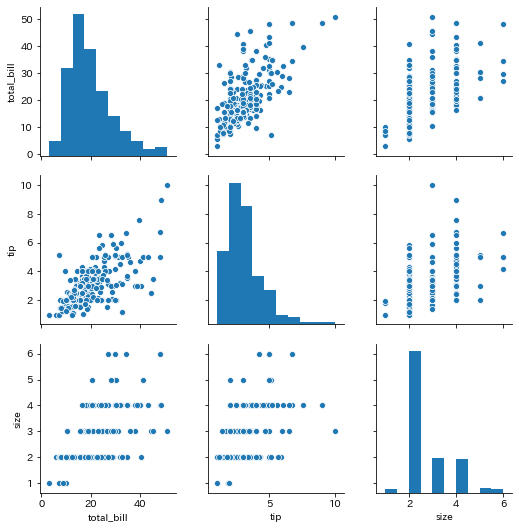

In [91]:
sns.pairplot(tips)

### ヒートマップ : sns.heatmap

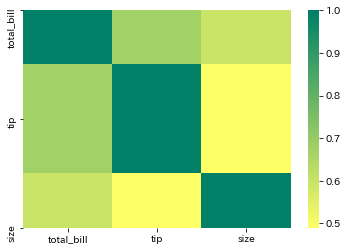

In [106]:
#  -> cmap : 色のパターンを指定
#        (何も指定しないとデフォルトの色付けになる)
sns.heatmap( tips.corr() , cmap =  'summer_r' )

In [103]:
# corr : 相関係数(2変数の関係)を出す
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


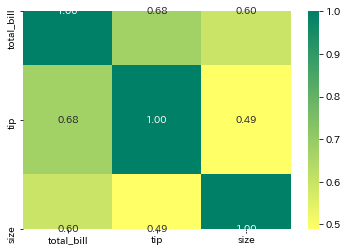

In [118]:
# ヒートマップ内部に数値を表記したい場合
#  - annot=True
#      - 数値のフォーマットも指定できる
#           - fmt = 'd' :  整数
#           - fmt = '.2f' : 小数点第2位
sns.heatmap( tips.corr() , cmap =  'summer_r' , annot = True , fmt = '.2f' )

#### matplotlib3.1.2 より以前のバージョンでは ...
- デフォルトではヒートマップ内の数値が見切れてしまう

In [164]:
# バージョン確認方法 (1)
import matplotlib
print(matplotlib.__version__)

3.1.1


In [160]:
# バージョン確認方法 (2)
# 以下のコマンドを実行して「matplotlib」の欄を確認する
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.4.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 19.4.0
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : None
LANG             : ja_JP.UTF-8
LOCALE           : ja_JP.UTF-8

pandas           : 0.25.1
numpy            : 1.17.2
pytz             : 2019.3
dateutil         : 2.8.0
pip              : 19.3.1
setuptools       : 41.4.0
Cython           : 0.29.13
pytest           : 5.2.1
hypothesis       : None
sphinx           : 2.2.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.1
lxml.etree       : 4.4.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.10.3
IPython          : 7.8.0
pandas_datareader: None
bs4              : 4.8.0
bottleneck       : 1.2.1
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.4.1
matplotlib       : 3.1.1
numexpr          

- 対策

(7, 0)

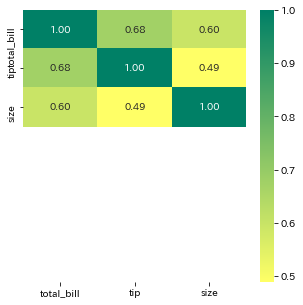

In [141]:
#   - 一応の解決にはなるが ... 別の問題が発生する
# 　　- カラーバーとの長さが合わず、変な描画になってしまう
fig, ax = plt.subplots( figsize=(5, 5) )
sns.heatmap( tips.corr() , cmap =  'summer_r' , annot = True , fmt = '.2f' , ax = ax )
ax.set_ylim(len(tips.columns), 0)

(7, 0)

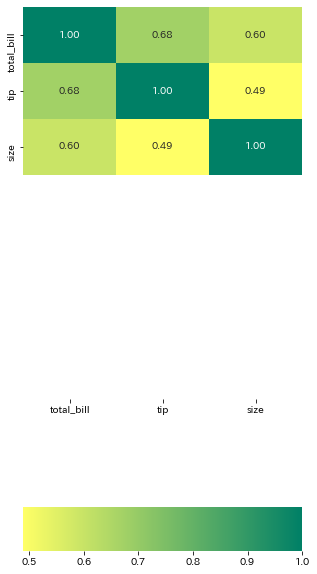

In [155]:
# カラーバーを下に持って描画してみる
#  - それでもあまり変わらない ... 
fig, ax = plt.subplots( 2, gridspec_kw = {'height_ratios': (.9, .1), 'hspace' : .5} ,
                                      figsize = (5, 10) )

sns.heatmap( tips.corr() , cmap =  'summer_r' , annot = True , fmt = '.2f' , 
                         ax = ax[0] , cbar_ax = ax[1] , 
                         cbar_kws = { 'orientation' : 'horizontal' } )
ax[0].set_ylim(len(tips.columns), 0)

- バージョンアップが可能な環境であれば、最新版を利用すること

 #### matplotlibのアップデート/バージョンアップ
 
 - コマンドラインにて以下を実行する
 
[Anacondaの場合]

- Anacondaの特定のパッケージのアップデート

``` bash
conda update matplotlib
```

[pipの場合]

``` bash
pip install -U matplotlib
```

#### [参考] Seabornを使わずヒートマップを描画する方法

In [100]:
# corr の後に style.background_gradient() を付ける
tips.corr().style.background_gradient( 'summer_r' )

,total_bill,tip,size
total_bill,1,0.675734,0.598315
tip,0.675734,1,0.489299
size,0.598315,0.489299,1


- ヒートマップ内の数値は自動で描画される
- スケールバーは付かない

#### カテゴリ毎のデータ分布 (1)  : sns.swarmplot

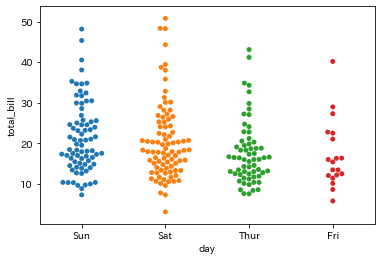

In [167]:
# 1つ目に指定した列に含まれるカテゴリ毎に
# 2つ目に指定した列の分布を可視化する
#   - どこに、どれくらいの数が集まっているのか、を可視化できる
sns.swarmplot( 'day', 'total_bill', data = tips )

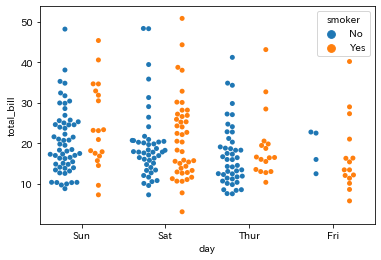

In [170]:
# 詳細化
#  - hue : 色相。可視化の切り口を追加したい場合は 列名を指定する。
#              より細かくカテゴリ毎に分類、色分けしたい時に用いる。
#  - dodge : 追加した切り口を重ねない場合は True を指定
sns.swarmplot( 'day', 'total_bill', data = tips , hue = 'smoker' , dodge = True)

#### カテゴリ毎のデータ分布 (2) : sns.boxplot
- いわゆる「箱ひげ図」と呼ばれるもの

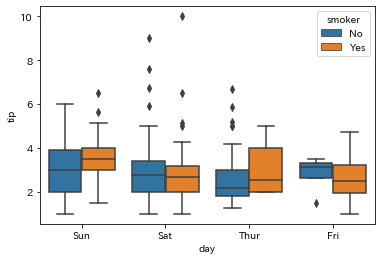

In [183]:
#  - hue : 切り口
sns.boxplot( tips['day'], tips['tip'], hue = tips['smoker'] )

- 箱の中央の線 : 中央値
- 黒点 : 外れ値